## Credit scoring and segmentation

In [40]:
# import des librairies
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from sklearn.cluster import KMeans
pio.templates.default = "plotly_white"

In [41]:
# import du dataset
data_credit_scoring = pd.read_csv("/Users/ranu/Documents/Data-Science-project/Finance/synthetic_credit_data.csv")

In [42]:
# 10 premières lignes du dataset
data_credit_scoring.head(10)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,56,Male,Single,PhD,Unemployed,0.40,2483.9,1,2877543,6.38,36,Auto Loan
1,69,Male,Married,Master,Unemployed,0.95,579.4,4,3380698,6.00,36,Personal Loan
2,46,Male,Widowed,PhD,Employed,0.97,2455.1,5,2332018,6.98,12,Home Loan
3,32,Female,Single,Bachelor,Self-Employed,0.39,1100.2,13,725003,8.06,24,Auto Loan
4,60,Male,Widowed,High School,Employed,0.85,860.8,6,2285598,6.34,12,Home Loan
5,25,Male,Married,PhD,Employed,0.77,789.3,5,4902571,2.59,60,Personal Loan
6,38,Male,Single,PhD,Employed,0.31,568.1,1,4501260,3.20,36,Personal Loan
7,56,Female,Divorced,PhD,Unemployed,0.23,1809.0,3,846002,7.40,48,Home Loan
8,36,Female,Married,PhD,Unemployed,0.46,1045.6,1,1371621,2.97,12,Home Loan
9,40,Male,Divorced,High School,Unemployed,0.78,2973.6,11,1180642,2.01,60,Home Loan


In [43]:
# Info sur les données
print(data_credit_scoring.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [44]:
# Détails des données
data_credit_scoring.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,43.81900,0.515120,1704.916700,7.452000,2.546580e+06,4.995760,35.304000
std,14.99103,0.283412,732.590195,4.021675,1.432169e+06,2.011785,17.475382
min,18.00000,0.000000,500.500000,1.000000,2.287900e+04,1.500000,12.000000
25%,31.00000,0.280000,1075.325000,4.000000,1.352033e+06,3.245000,24.000000
50%,44.00000,0.520000,1672.900000,7.000000,2.557906e+06,4.945000,36.000000
75%,56.00000,0.760000,2356.800000,11.000000,3.818636e+06,6.800000,48.000000
max,69.00000,1.000000,2994.100000,14.000000,4.986820e+06,8.490000,60.000000


In [45]:
# Boxplot sur le ratio d'utilisation du crédit
credit_boxplot_fig = px.box(data_credit_scoring,
                            y = "Credit Utilization Ratio",
                            title="Distribution des valeurs d'utilisation de crédit")

credit_boxplot_fig.show()

In [46]:
# Distribution du nombre de compte de crédits
nb_credit_account_boxplot_fig = px.box(data_credit_scoring,
                            y = "Number of Credit Accounts",
                            title="Distribution du nombre de compte de crédits")

nb_credit_account_boxplot_fig.show()

In [47]:
# Histogramme des prêts
loan_amount_fig = px.histogram(data_credit_scoring, 
                               x='Loan Amount', 
                               nbins=20, 
                               title='Distribution de la quantité de prêt')
loan_amount_fig.show()

<Axes: >

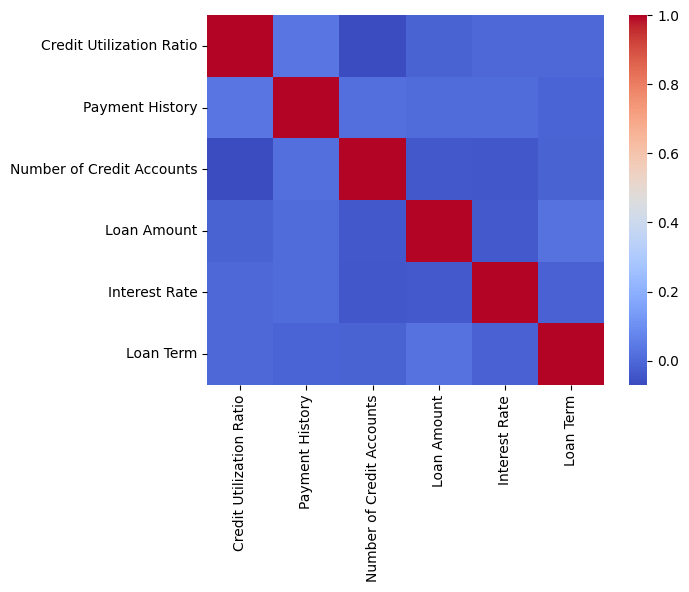

In [48]:
# Matrice de corrélation
interest_features_data = data_credit_scoring[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]

sns.heatmap(interest_features_data.corr(), cmap="coolwarm")

In [49]:
# Affichage de tous les colonnes
pd.set_option("display.max_column", None)

In [50]:
## Calcul des statistiques sur les comptes de crédits et de quantités de prêt par statut
data_credit_scoring.groupby("Employment Status")[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']].describe()

Credit Utilization Ratio                                   \
                                     count      mean       std  min     25%   
Employment Status                                                             
Employed                             353.0  0.503371  0.282243  0.0  0.2800   
Self-Employed                        334.0  0.507066  0.291525  0.0  0.2325   
Unemployed                           313.0  0.536965  0.275502  0.0  0.3300   

                                       Payment History               \
                     50%     75%   max           count         mean   
Employment Status                                                     
Employed           0.500  0.7500  0.99           353.0  1699.994618   
Self-Employed      0.515  0.7575  1.00           334.0  1692.845808   
Unemployed         0.560  0.7700  1.00           313.0  1723.348562   

                                                                         \
                          std    min       25%     50%      75%     max   
Employment Status                                                         
Employed           747.017492  500.5  1050.200  1670.0  2373.40  2992.3   
Self-Employed      696.852341  504.1  1119.975  1660.5  2261.45  2994.1   
Unemployed         755.012996  527.7  1061.500  1724.7  2440.70  2991.4   

                  Number of Credit Accounts                                \
                                      count      mean       std  min  25%   
Employment Status                                                           
Employed                              353.0  7.263456  4.148007  1.0  4.0   
Self-Employed                         334.0  7.886228  3.936308  1.0  5.0   
Unemployed                            313.0  7.201278  3.941202  1.0  4.0   

                                   Loan Amount                              \
                   50%   75%   max       count          mean           std   
Employment Status                                                            
Employed           7.0  11.0  14.0       353.0  2.571962e+06  1.441479e+06   
Self-Employed      8.0  11.0  14.0       334.0  2.643709e+06  1.448471e+06   
Unemployed         7.0  10.0  14.0       313.0  2.414310e+06  1.398419e+06   

                                                                          \
                       min         25%        50%         75%        max   
Employment Status                                                          
Employed           22879.0  1401449.00  2579464.0  3857593.00  4983064.0   
Self-Employed      26939.0  1470277.75  2635681.0  3984174.25  4961904.0   
Unemployed         29156.0  1214656.00  2347180.0  3635613.00  4986820.0   

                  Interest Rate                                                \
                          count      mean       std   min    25%   50%    75%   
Employment Status                                                               
Employed                  353.0  5.199773  2.051006  1.50  3.450  5.27  7.060   
Self-Employed             334.0  4.898084  2.000507  1.54  3.195  4.75  6.705   
Unemployed                313.0  4.869904  1.966861  1.51  3.150  4.75  6.590   

                        Loan Term                                          \
                    max     count       mean        std   min   25%   50%   
Employment Status                                                           
Employed           8.49     353.0  35.456091  18.262571  12.0  12.0  36.0   
Self-Employed      8.46     334.0  33.700599  17.068847  12.0  12.0  36.0   
Unemployed         8.49     313.0  36.843450  16.894974  12.0  24.0  36.0   

                               
                    75%   max  
Employment Status              
Employed           48.0  60.0  
Self-Employed      48.0  60.0  
Unemployed         48.0  60.0

In [51]:
## Calcul des statistiques sur les comptes de crédits et de quantité par niveau d'éducation
data_credit_scoring.groupby("Education Level")[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']].describe()

Credit Utilization Ratio                                    \
                                   count      mean       std   min     25%   
Education Level                                                              
Bachelor                           256.0  0.489805  0.291770  0.00  0.2500   
High School                        247.0  0.536599  0.280714  0.01  0.3350   
Master                             225.0  0.521600  0.269265  0.01  0.3100   
PhD                                272.0  0.514081  0.288913  0.01  0.2725   

                                     Payment History                           \
                   50%     75%   max           count         mean         std   
Education Level                                                                 
Bachelor         0.505  0.7500  0.99           256.0  1665.903906  744.900477   
High School      0.520  0.7800  1.00           247.0  1671.288664  737.159970   
Master           0.540  0.7400  0.99           225.0  1738.512444  717.104352   
PhD              0.540  0.7725  1.00           272.0  1744.381250  730.072455   

                                                             \
                   min       25%      50%       75%     max   
Education Level                                               
Bachelor         513.5  1018.400  1611.65  2325.850  2992.3   
High School      503.4  1063.250  1611.30  2244.900  2994.1   
Master           502.3  1161.300  1748.30  2375.100  2986.5   
PhD              500.5  1085.975  1730.80  2429.525  2988.7   

                Number of Credit Accounts                                     \
                                    count      mean       std  min  25%  50%   
Education Level                                                                
Bachelor                            256.0  7.523438  4.264702  1.0  4.0  7.5   
High School                         247.0  7.404858  3.837933  1.0  4.0  7.0   
Master                              225.0  7.395556  3.805421  1.0  4.0  7.0   
PhD                                 272.0  7.474265  4.142222  1.0  4.0  8.0   

                            Loan Amount                                       \
                  75%   max       count          mean           std      min   
Education Level                                                                
Bachelor         11.0  14.0       256.0  2.506461e+06  1.452360e+06  39777.0   
High School      10.5  14.0       247.0  2.664849e+06  1.363287e+06  34363.0   
Master           10.0  14.0       225.0  2.388723e+06  1.482459e+06  22879.0   
PhD              11.0  14.0       272.0  2.607522e+06  1.426172e+06  26939.0   

                                                              Interest Rate  \
                        25%        50%         75%        max         count   
Education Level                                                               
Bachelor         1259723.25  2394568.5  3784607.75  4986820.0         256.0   
High School      1494568.00  2714489.0  3870000.00  4983064.0         247.0   
Master            988534.00  2424607.0  3664250.00  4960860.0         225.0   
PhD              1401515.75  2716021.5  3834573.75  4969691.0         272.0   

                                                                        \
                     mean       std   min     25%    50%     75%   max   
Education Level                                                          
Bachelor         4.880469  1.993993  1.64  3.1900  4.750  6.6725  8.48   
High School      5.211457  1.989431  1.51  3.7300  5.210  6.9600  8.42   
Master           4.803556  2.009570  1.53  3.1200  4.720  6.4800  8.46   
PhD              5.067390  2.038850  1.50  3.3125  5.065  6.8750  8.49   

                Loan Term                                                      
                    count       mean        std   min   25%   50%   75%   max  
Education Level                                                                
Bachelor            256.

In [52]:
## Définir des niveaux pour les variables sur le "niveau d'éducation" et le "statut de l'employé"
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

data_credit_scoring["Education Level"] = data_credit_scoring["Education Level"].map(education_level_mapping)
data_credit_scoring["Employment Status"] = data_credit_scoring["Employment Status"].map(employment_status_mapping)

In [53]:
## Création d'une liste vide
list_credit_score = []

## Calcul du score de crédit à partir de la formule de FICO
for index, row in data_credit_scoring.iterrows():
    history_payment = row["Payment History"]
    number_of_credit_acounts = row["Number of Credit Accounts"]
    credit_utilization_ratio = row["Credit Utilization Ratio"]
    employment_status = row["Employment Status"]
    education_level = row["Education Level"]
    credit_score = (history_payment * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_acounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    list_credit_score.append(credit_score)
    
## Enregistrer les valeurs dans le dataframe
data_credit_scoring["credit_score"] = list_credit_score

In [54]:
data_credit_scoring["credit_score"]

0      870.035
1      203.975
2      860.826
3      387.537
4      302.635
        ...   
995    804.467
996    425.375
997    461.363
998    193.690
999    843.396
Name: credit_score, Length: 1000, dtype: float64

In [55]:
## Segmentation

### focus sur le score de crédit
X = data_credit_scoring[["credit_score"]] 

### construction de 4 classes
cluster = KMeans(n_clusters = 4, n_init=10, random_state=42)
cluster.fit(X)

### conserver les résultats
data_credit_scoring["segmentation"] = cluster.labels_


In [58]:
## Convertir la variable "segmentation" en catégorielle
data_credit_scoring["segmentation"] = data_credit_scoring["segmentation"].astype("category")

fig = px.scatter(data_credit_scoring,
            x = data_credit_scoring.index,
            y = "credit_score",
            color="segmentation",
            title = "Segmentation des scores de crédits"
           )

fig.show()

In [59]:
# Grâce au précédent graphe, on peut établir une remarque
segmentation_mapping = {1 : "Excellent", 3 : "Bon", 0 : "Moyen", 2 : "Mauvais"}
data_credit_scoring["segmentation"] = data_credit_scoring["segmentation"].map(segmentation_mapping)
fig = px.scatter(data_credit_scoring,
            x = data_credit_scoring.index,
            y = "credit_score",
            color="segmentation",
            title = "Segmentation des scores de crédits"
           )

fig.show()